In [2]:
import os
import cv2
import numpy as np
import tensorflow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import matplotlib.pyplot as plt

In [3]:
folder_dir = './test'
data = []
label = []

SIZE = 128
#Nettoyage des données
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [6]:
data_arr = np.array(data)
label_arr = np.array(label)

In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,2)
X = data_arr/255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
#on sépare notre database en 2 partie : une partie entrainement de 80% et une partie de test de 20%

In [1]:
#On crée un modèle séquentiel
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation = "softmax"))

NameError: name 'Sequential' is not defined

In [9]:
model = Sequential()

initializers = {

}
model.add(
    Conv2D(
        24, 5, input_shape=(256,256,3),
        activation='relu',
    )
)
model.add(MaxPooling2D(2))
model.add(
    Conv2D(
        48, 5, activation='relu',
    )
)
model.add(MaxPooling2D(2) )
model.add(
    Conv2D(
        96, 5, activation='relu',
    )
)
model.add(Flatten() )
model.add(Dropout(0.9) )

model.add(Dense(
    2, activation='softmax',
    )
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [11]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=2
#Tour d'entrainement
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2


InvalidArgumentError:  Input to reshape is a tensor with 60000 values, but the requested shape requires a multiple of 311904
	 [[node sequential/flatten/Reshape
 (defined at c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\layers\core\flatten.py:96)
]] [Op:__inference_train_function_848]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/flatten/Reshape:
In[0] sequential/conv2d_2/Relu (defined at c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\backend.py:4867)	
In[1] sequential/flatten/Const (defined at c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\layers\core\flatten.py:91)

Operation defined at: (most recent call last)
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\runpy.py", line 193, in _run_module_as_main
>>>     "__main__", mod_spec)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\runpy.py", line 85, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\asyncio\base_events.py", line 538, in run_forever
>>>     self._run_once()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\asyncio\base_events.py", line 1782, in _run_once
>>>     handle._run()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\asyncio\events.py", line 88, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
>>>     raw_cell, store_history, silent, shell_futures)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
>>>     interactivity=interactivity, compiler=compiler, result=result)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\Benja\AppData\Local\Temp/ipykernel_9984/1693178777.py", line 8, in <module>
>>>     verbose = 1)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 2030, in fit_generator
>>>     initial_epoch=initial_epoch)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\functional.py", line 452, in call
>>>     inputs, training=training, mask=mask)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\users\benja\appdata\local\programs\python\python37\lib\site-packages\keras\layers\core\flatten.py", line 96, in call
>>>     return tf.reshape(inputs, flattened_shape)
>>> 

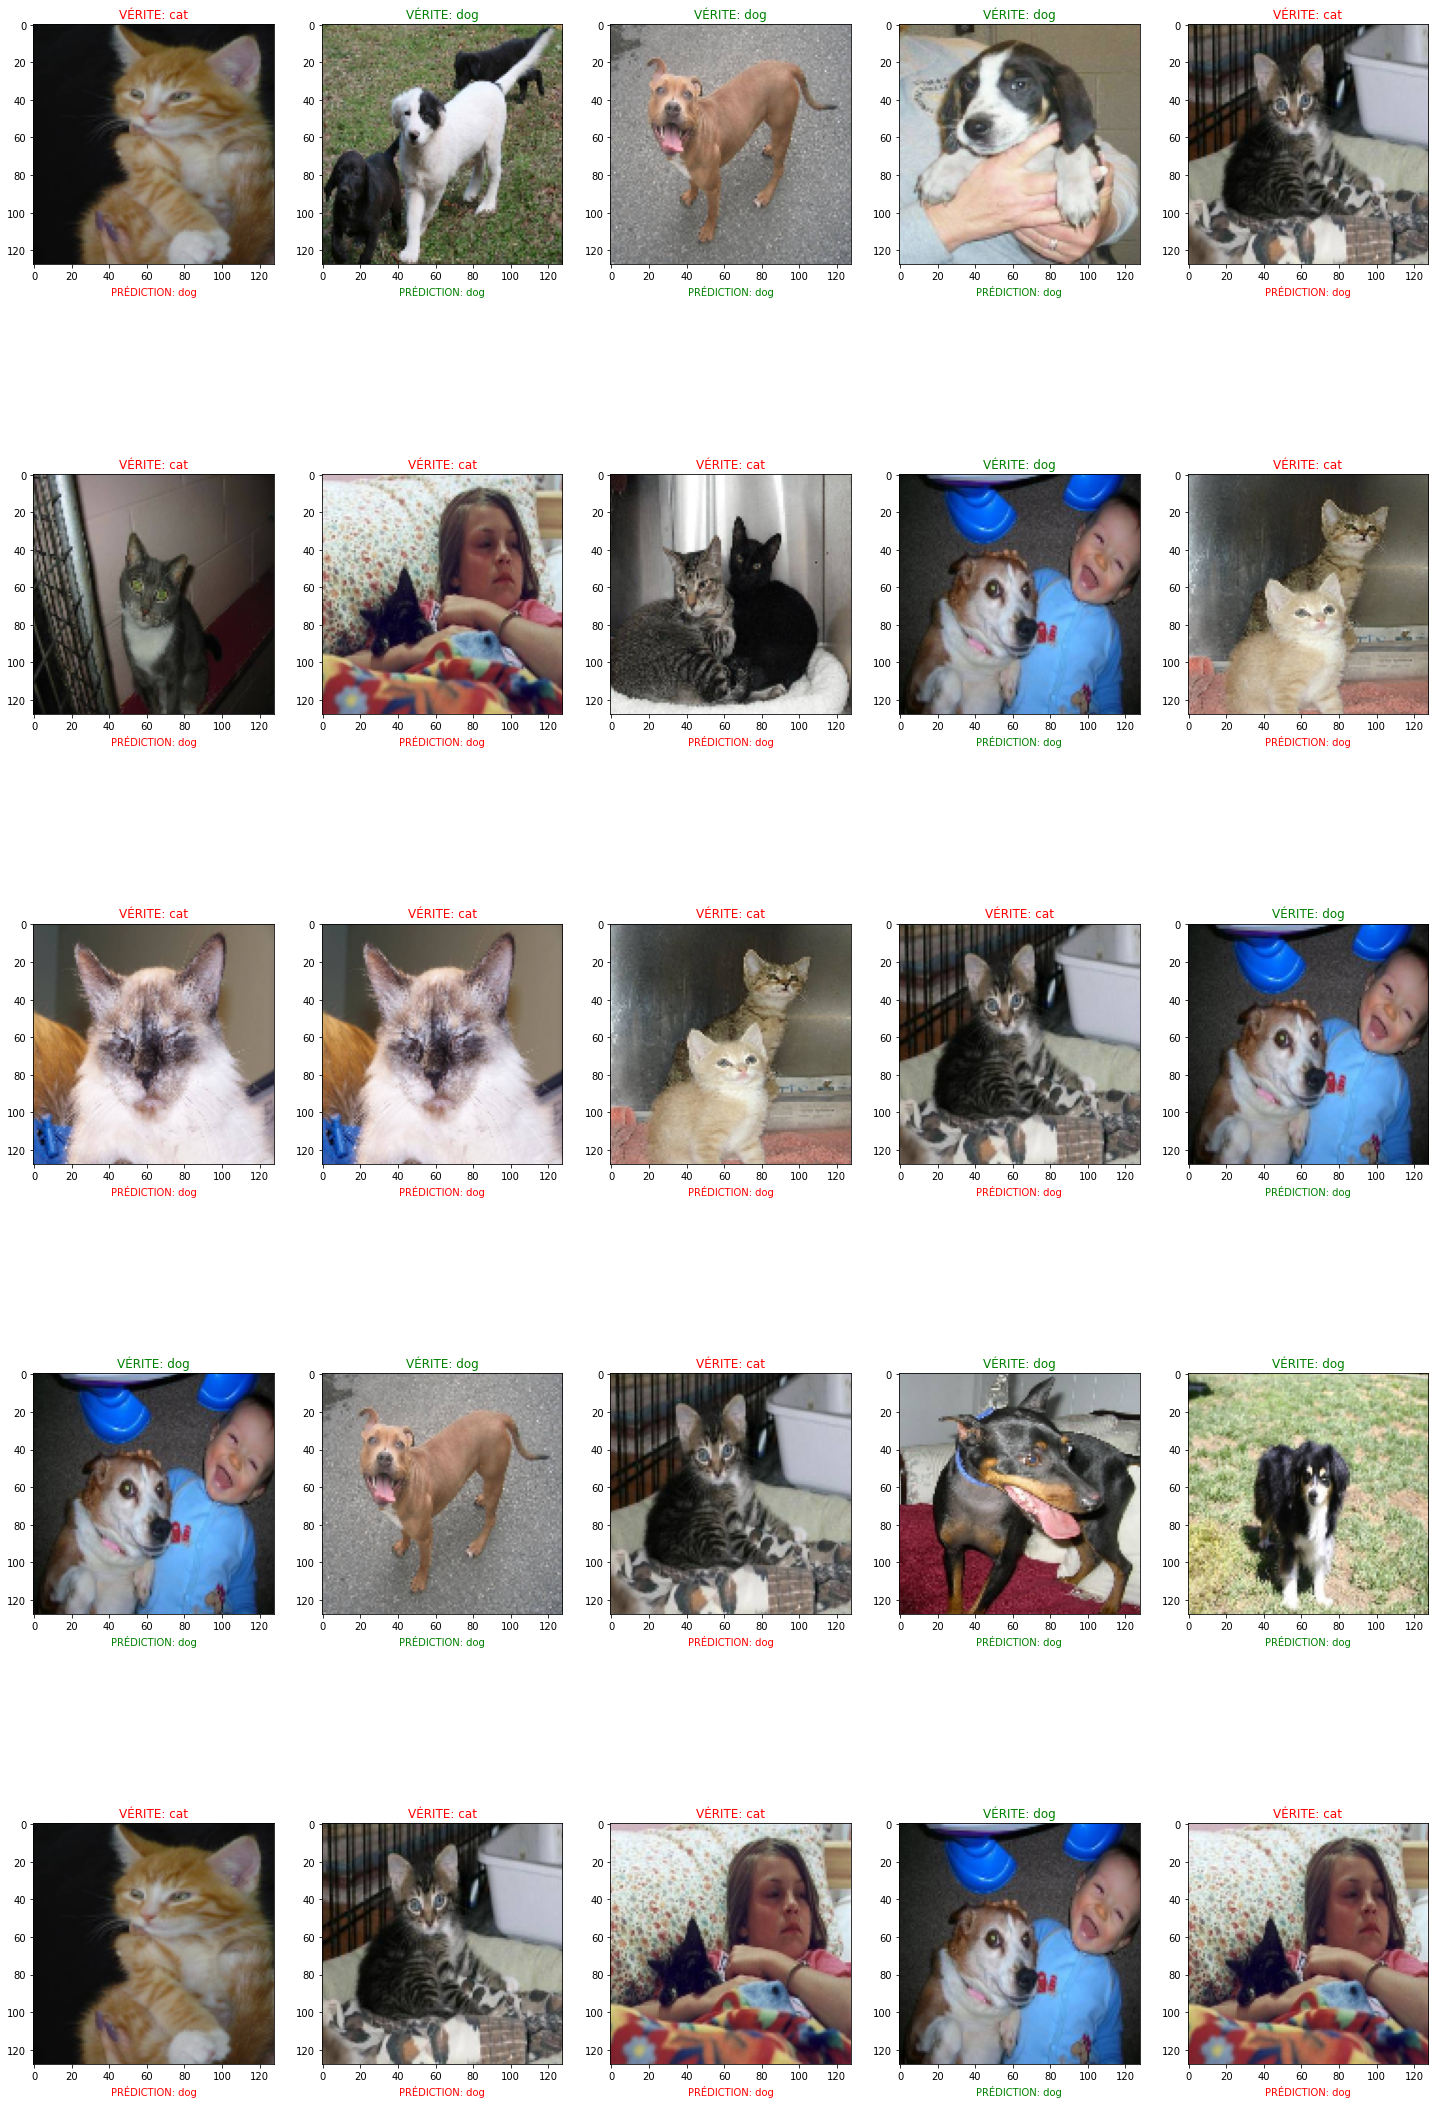

In [10]:
#On teste si le modèle reconnait les données
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(5,5, figsize=(25, 40))

for i in range(5):
    for j in range(5):
        k = int(np.random.random_sample() * len(X_test))
        #si la prédiction est égale à la vérité
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("VÉRITE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PRÉDICTION: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        #sinon c'est que la prédiction est fausse
        else:
            ax[i,j].set_title("VÉRITE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PRÉDICTION: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')